In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
delivery_time = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Simple Linear Regression\\delivery_time.csv")

In [4]:
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
delivery_time1 = delivery_time.rename({'Delivery Time': 'DT', 'Sorting Time' : 'ST'}, axis=1)

#### Dataset Visualization

Text(0, 0.5, 'Delivery Time')

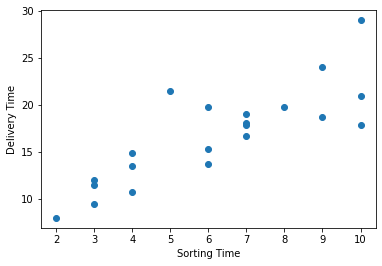

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
x = delivery_time1.ST
y = delivery_time1.DT
plt.scatter(x,y)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")


C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

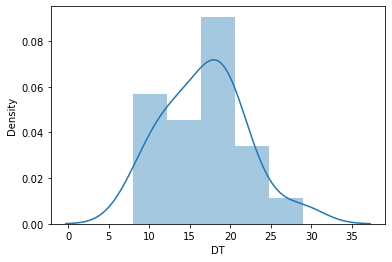

In [9]:
sns.distplot(delivery_time1['DT'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

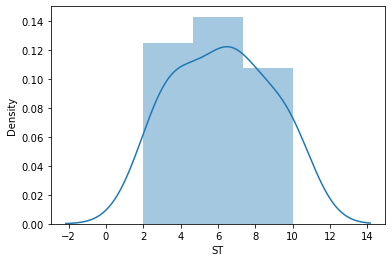

In [10]:
sns.distplot(delivery_time1['ST'])

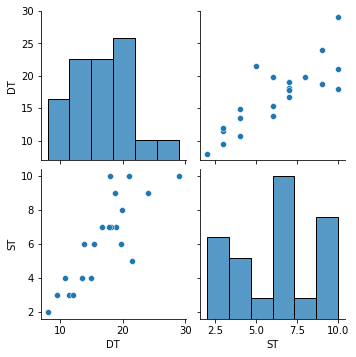

In [11]:
sns.pairplot(delivery_time1)

<AxesSubplot:xlabel='ST', ylabel='DT'>

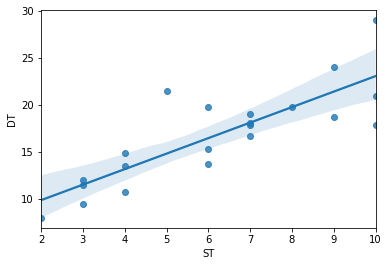

In [12]:
sns.regplot(x=delivery_time1['ST'],y=delivery_time1['DT'])

#### Model Building

In [13]:
import statsmodels.formula.api as smf 
model = smf.ols("DT~ST",data = delivery_time1).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        10:57:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Predictions

In [14]:
#Manual Calculation
DT = 6.5827 + (1.6490) * (10) #10 = Sorting time
DT

23.0727

In [15]:
newdata=pd.Series([10,16])

In [16]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [18]:
model.predict(data_pred)

0    23.072933
1    32.967052
dtype: float64

#### Applying Transformations

In [1]:
#Logarithmic Transformation

In [17]:
data = delivery_time1.copy()

In [18]:
data['DT'] = np.log(data['DT'])
data['ST'] = np.log(data['ST'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

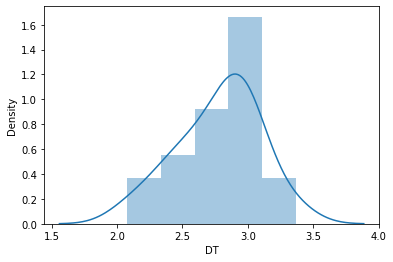

In [21]:
sns.distplot(data['DT'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

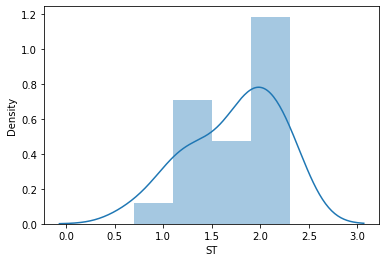

In [22]:
sns.distplot(data['ST'])

<AxesSubplot:xlabel='ST', ylabel='DT'>

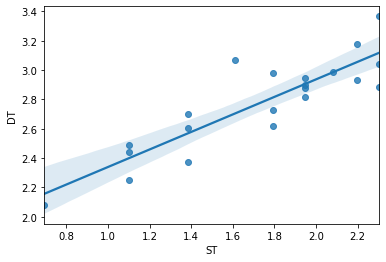

In [23]:
sns.regplot(x=data['ST'],y=data['DT'])

In [19]:
model1 = smf.ols("DT~ST",data = data).fit()

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.60e-07
Time:                        10:59:52   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
ST             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Since the Rsquared value is still low after first transformation, we will go for another iteration

In [35]:
data_a = data.copy()

In [36]:
data_a['DT'] = np.log(data_a['DT'])
data_a['ST'] = np.log(data_a['ST'])

In [42]:
model1a = smf.ols("DT~ST",data = data_a).fit()

In [43]:
model1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           4.05e-08
Time:                        11:14:03   Log-Likelihood:                 32.435
No. Observations:                  21   AIC:                            -60.87
Df Residuals:                      19   BIC:                            -58.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8447      0.023     37.344      0.000       0.797       0.892
ST             0.3357      0.038      8.787      0.000       0.256       0.416
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.359
Skew:                           0.284   Prob(JB):                        0.836
Kurtosis:                       2.706   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After completing 2 iterations with the transformed data (logarithmic), we can see that the R-Squared value is now significant.

In [24]:
#Square Root Transformation

In [25]:
data1 = delivery_time1.copy()

In [26]:
data1['DT'] = np.sqrt(data1['DT'])
data1['ST'] = np.sqrt(data1['ST'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

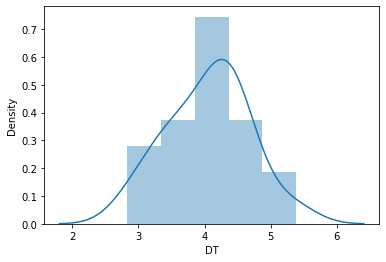

In [29]:
sns.distplot(data1['DT'])

C:\Users\yasha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

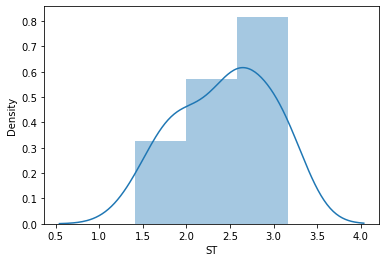

In [30]:
sns.distplot(data1['ST'])

<AxesSubplot:xlabel='ST', ylabel='DT'>

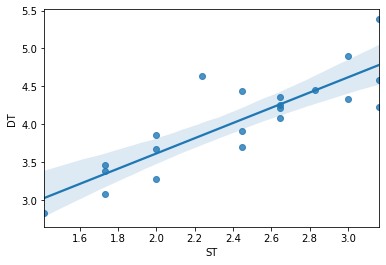

In [31]:
sns.regplot(x=data1['ST'],y=data1['DT'])

In [32]:
model2 = smf.ols("DT~ST",data = data1).fit()

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           8.48e-07
Time:                        11:07:44   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
ST             1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Since the Rsquared value is still low after first transformation, we will go for another iteration

In [40]:
data_1a = data1.copy()

In [41]:
data_1a['DT'] = np.sqrt(data_1a['DT'])
data_1a['ST'] = np.sqrt(data_1a['ST'])

In [44]:
model2a = smf.ols("DT~ST",data = data_1a).fit()

In [45]:
model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     57.42
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.72e-07
Time:                        11:14:43   Log-Likelihood:                 24.182
No. Observations:                  21   AIC:                            -44.36
Df Residuals:                      19   BIC:                            -42.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8040      0.160      5.033      0.000       0.470       1.138
ST             0.7760      0.102      7.578      0.000       0.562       0.990
==============================================================================
Omnibus:                        2.408   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.449
Skew:                           0.643   Prob(JB):                        0.485
Kurtosis:                       3.037   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Since the Rsquared value is still low after second transformation, we will go for another iteration

In [47]:
data_1b = data_1a.copy()

In [48]:
data_1b['DT'] = np.sqrt(data_1b['DT'])
data_1b['ST'] = np.sqrt(data_1b['ST'])

In [49]:
model2b = smf.ols("DT~ST",data = data_1b).fit()

In [50]:
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     60.82
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.44e-07
Time:                        11:16:14   Log-Likelihood:                 46.366
No. Observations:                  21   AIC:                            -88.73
Df Residuals:                      19   BIC:                            -86.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5685      0.109      5.225      0.000       0.341       0.796
ST             0.6815      0.087      7.799      0.000       0.499       0.864
==============================================================================
Omnibus:                        2.149   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.315
Skew:                           0.613   Prob(JB):                        0.518
Kurtosis:                       2.977   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Applying square root transformation only marginally improves the R-Squared value each iteration as compared to logarithmic transformation. So we will move ahead with log transformation to predict new data

#### Model Predictions with Transformed Data

In [51]:
#Manual Calculation
DT = 0.8447 + (0.3357) * (10) #10 = Sorting time
DT

4.201700000000001

In [52]:
newdata1=pd.Series([10,16])

In [53]:
data_pred1=pd.DataFrame(newdata1,columns=['ST'])

In [55]:
model1a.predict(data_pred1)

0    4.201295
1    6.215258
dtype: float64